In [54]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import statistics as stats

Source: https://archive.ics.uci.edu/ml/datasets/Spambase

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



In [2]:
df = pd.read_csv("spambase.data", header = None)

In [10]:
column_names = ['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 'char_freq_!',
 'char_freq_$',
 'char_freq_#',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total',
 'y']

In [12]:
df.columns = column_names

In [13]:
ProfileReport(df,minimal=True)

There is a small imbalance problem, there are 1813 mails considered as spam and 2788 mails considered as nor spam

<AxesSubplot:>

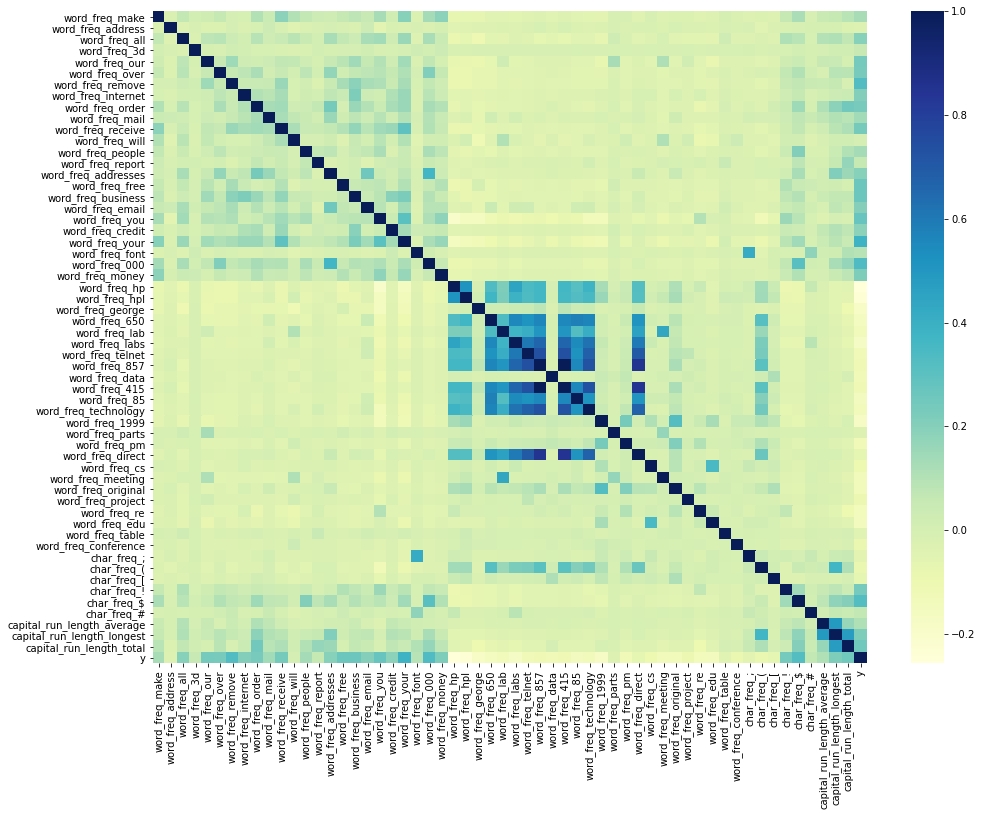

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap= "YlGnBu")

It seems like the columns have low correlation.

In [15]:
y = np.asarray(df["y"])
X = np.asarray(df.drop("y",1))

In [16]:
X.shape

(4601, 57)

In [17]:
y.shape

(4601,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#  Lasso

In [19]:
print("Original")
lasso_model_original = Lasso().fit(X_train,y_train)
lasso_prediction_original = lasso_model_original.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,lasso_prediction_original>lasso_prediction_original.mean()))

Original
Accuracy score:  0.6550362080315998


In [20]:
print("Manual")
lasso_model_manual = Lasso(alpha = 0.01).fit(X_train,y_train)
lasso_prediction_manual = lasso_model_manual.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,lasso_prediction_original>lasso_prediction_original.mean()))

Manual
Accuracy score:  0.6550362080315998


In [21]:
lasso_grid_search = {'alpha': list(np.linspace(0, 0.01, 6, dtype=float))}

lasso_model_grid = GridSearchCV(estimator=Lasso(), param_grid = lasso_grid_search,
                                     cv=5, n_jobs=-1,return_train_score = True)
lasso_model_grid.fit(X_train, y_train)

print("Grid")
print("Best alpha: ", lasso_model_grid.best_estimator_.alpha)
lasso_prediction_grid = lasso_model_grid.best_estimator_.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,lasso_prediction_grid>lasso_prediction_grid.mean()))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Grid
Best alpha:  0.0
Accuracy score:  0.9058591178406846


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.71276303889044, tolerance: 0.0728215444516548
  model = cd_fast.enet_coordinate_descent(


In [22]:
results = pd.DataFrame(lasso_model_grid.cv_results_)
results["mean_train_score"]

0    0.564489
1    0.558650
2    0.549585
3    0.539826
4    0.530251
5    0.519341
Name: mean_train_score, dtype: float64

In [23]:
results["mean_test_score"]

0    0.523813
1    0.518877
2    0.510570
3    0.499147
4    0.486614
5    0.472073
Name: mean_test_score, dtype: float64

These are R2 scores, so let's compare them to the prediction's r2 score

In [24]:
lasso_prediction_grid_r2 = lasso_model_grid.best_estimator_.predict(X_test)
print("R2 score: ", r2_score(y_test,lasso_prediction_grid_r2))

R2 score:  0.5413412968423789


The accuracy score is very good, but the cross validation results show some underfitting. It's not the case for test score though.

# Decision Tree 

In [25]:
print("Original")
dt_model_original = DecisionTreeClassifier().fit(X_train,y_train)
dt_prediction_original = dt_model_original.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,dt_prediction_original))

Original
Accuracy score:  0.9058591178406846


In [26]:
print("Manual")
dt_model_manual = DecisionTreeClassifier(min_samples_leaf = 2 ,ccp_alpha = 0).fit(X_train,y_train)
dt_prediction_manual = dt_model_manual.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,dt_prediction_manual))

Manual
Accuracy score:  0.9065174456879526


In [36]:
dt_grid_search = {'min_samples_leaf': list(np.linspace(10, 30, 6, dtype=int)),
                 'ccp_alpha': list(np.linspace(0, 1, 6, dtype=float))}

dt_model_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = dt_grid_search,
                                     verbose = 5,cv=5, n_jobs=-1,return_train_score = True)
dt_model_grid.fit(X_train, y_train)

print("Grid")
print("Best min_samples_leaf: ", dt_model_grid.best_estimator_.min_samples_leaf)
print("Best ccp_alpha: ", dt_model_grid.best_estimator_.ccp_alpha)
dt_prediction_grid = dt_model_grid.best_estimator_.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,dt_prediction_grid))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


Grid
Best min_samples_leaf:  18
Best ccp_alpha:  0.0
Accuracy score:  0.8986175115207373


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.2s finished


In [37]:
results = pd.DataFrame(dt_model_grid.cv_results_)
results[results["rank_test_score"]<=5]["mean_train_score"]

1    0.926509
2    0.919370
3    0.914828
4    0.912962
5    0.913044
Name: mean_train_score, dtype: float64

In [38]:
results[results["rank_test_score"]<=5]["mean_test_score"]

1    0.903314
2    0.907212
3    0.906565
4    0.907208
5    0.904937
Name: mean_test_score, dtype: float64

The best "the minimal number of observations per tree leaf" is 18 and best complexity is 0.0.
The accuracy score is not much better than lasso regression. Maybe it could be improved further with more hyperparameter tuning. But the results are pretty good as is.

# Random Forest

In [39]:
print("Original")
rf_model_original = RandomForestClassifier().fit(X_train,y_train)
rf_prediction_original = rf_model_original.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,rf_prediction_original))

Original
Accuracy score:  0.956550362080316


In [40]:
print("Manual")
rf_model_manual = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 5, max_samples = 150).fit(X_train,y_train)
rf_prediction_manual = rf_model_manual.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,rf_prediction_manual))

Manual
Accuracy score:  0.9150757077024358


In [45]:
rf_grid_search = {'max_samples': list(np.linspace(500, 750, 6, dtype=int))}

rf_model_grid = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 500, min_samples_leaf = 5), param_grid = rf_grid_search,
                                     verbose = 5,cv=5, n_jobs=-1,return_train_score = True)
rf_model_grid.fit(X_train, y_train)

print("Grid")
print("Best max_samples: ", rf_model_grid.best_estimator_.max_samples)
rf_prediction_grid = rf_model_grid.best_estimator_.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,rf_prediction_grid))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   16.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.1s finished


Grid
Best max_samples:  750
Accuracy score:  0.9387755102040817


In [46]:
results = pd.DataFrame(rf_model_grid.cv_results_)
results[results["rank_test_score"]<=5]["mean_train_score"]

1    0.936973
2    0.938514
3    0.939731
4    0.940542
5    0.941596
Name: mean_train_score, dtype: float64

In [47]:
results[results["rank_test_score"]<=5]["mean_test_score"]

1    0.928294
2    0.929591
3    0.928291
4    0.930240
5    0.931214
Name: mean_test_score, dtype: float64

There is no sign of under or overfitting and the accuracy score is consistent with all samples.

However, it is interesting that the original RandomForestClassifier() was better.

# Stochastic Gradient Boosting

In [48]:
print("Original")
gb_model_original = GradientBoostingClassifier().fit(X_train,y_train)
gb_prediction_original = gb_model_original.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,gb_prediction_original))

Original
Accuracy score:  0.9506254114549045


In [49]:
print("Manual")
gb_model_manual = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 200, max_depth = 5).fit(X_train,y_train)
gb_prediction_manual = gb_model_manual.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,gb_prediction_manual))

Manual
Accuracy score:  0.9328505595786701


:(

In [51]:
gb_grid_search = {'max_depth': list(np.linspace(1, 6, 3, dtype=int)),
                  'learning_rate': [0.01, 0.1, 0.2],
                  'n_estimators': list(np.linspace(100, 200, 4, dtype=int))}

gb_model_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = gb_grid_search,
                                     verbose = 5,cv=5, n_jobs=-1,return_train_score = True)
gb_model_grid.fit(X_train, y_train)

print("Grid")
print("Best max_depth: ", gb_model_grid.best_estimator_.max_depth)
print("Best learning_rate: ", gb_model_grid.best_estimator_.learning_rate)
print("Best n_estimators: ", gb_model_grid.best_estimator_.n_estimators)
gb_prediction_grid = gb_model_grid.best_estimator_.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test,gb_prediction_grid))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.4min finished


Grid
Best max_depth:  3
Best learning_rate:  0.2
Best n_estimators:  200
Accuracy score:  0.956550362080316


In [52]:
results = pd.DataFrame(gb_model_grid.cv_results_)
results[results["rank_test_score"]<=5]["mean_train_score"]

30    0.992862
31    0.994971
32    0.999189
34    0.999513
35    0.999676
Name: mean_train_score, dtype: float64

In [53]:
results = pd.DataFrame(gb_model_grid.cv_results_)
results[results["rank_test_score"]<=5]["mean_test_score"]

30    0.946143
31    0.948739
32    0.947440
34    0.947116
35    0.947766
Name: mean_test_score, dtype: float64

0.956 accuracy score is reached. There is still some overfitting, feature selection could be useful.

Let's see the cofusion matrix of the best model.

In [55]:
confusion_matrix(y_test, gb_prediction_grid)

array([[859,  27],
       [ 39, 594]])

The number of false positives and false negatives are relatively low, however the model produces a higher percentage of false positives.